# Projeto 1 - Ciência dos Dados

Nome: Athur Fonseca

Nome: Caio Tieri

Nome: Leonardo Andrade

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [51]:
%matplotlib inline
%pip install emoji
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import emoji
import functools
import operator

Note: you may need to restart the kernel to use updated packages.


In [52]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\T-Gamer\Downloads\INSPER\2 SEMESTRE (2021.2)\CDados\PROJETO-1-CDADOS


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [53]:
filename = 'Bis 1-340.xlsx'

In [54]:
train = pd.read_excel(filename)
train.head(5)


,Treinamento,Nível de Relevância,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,➡️ nossa super pizza de banana nevada que é re...,1,NaN,NaN,NaN,NaN,NaN
1,comi os 2 ultimos bis que restavam tava ate es...,3,NaN,NaN,NaN,NaN,NaN
2,@luatenorinho bis fazendo jus ao nome toda vez...,4,NaN,NaN,NaN,1.0,Irrelevante
3,"a sheilla esconde o bis das filhas, socorro kk...",3,NaN,NaN,NaN,2.0,Neutro
4,não comprei uma caixa de bis é uma barra de ch...,2,NaN,NaN,NaN,3.0,Relevante


In [55]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Nível de Relevância,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,eu quero replay kkkk \nvamo de novo no bis 🤣🤣🤣...,1,NaN,NaN,NaN
1,@sbrinamendes juro acharam uma garrafa de cach...,2,NaN,1.0,Irrelevante
2,@aatsumiya sabia que você ia responder bis fã,1,NaN,2.0,Neutro
3,@anapaula_bis olá. queremos muito te ajudar. p...,1,NaN,3.0,Relevante
4,@gen_heleno mudaram as fraldas a esse monte de...,1,NaN,4.0,Essencial


___
## Classificador automático de sentimento


# Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.



O produto é um chocolate marcado por trazer um sentimento de insaciedade e vontade de comer sempre mais um.

# Para julgar a relevância dos tweets seguimos o critério abaixo:

1(Irrelevante): Não cita o produto ou cita o nome 'bis' mas se referindo a outra coisa.

2(neutro): Fala do produto mas este não se encaixa como o assunto principal do tweet

3(relevante): Cita o produto como assunto principal, expressa indiretamente uma opinião sobre o produto

4(muito relevante): Cita o produto  como assunto principal do tweet e expressa uma opinião clara sobre o mesmo.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [56]:
treino = train.iloc[:,[0,1]]
treino.tail(20)

,Treinamento,Nível de Relevância
280,era só a caixinha de bis hoje🤤,3
281,a melhor parte foi o bis branco que mandaram d...,4
282,@bia_7285 resumindo teve a gatah brigando com ...,2
283,“ja que eu não posso fazer outra coisa vou com...,2
284,@koo__bis ele ts tao lindo,1
285,oxe cade meu bis q eu tinha guardado p come ca...,2
286,o bis eu ofereci pra turma na sala. mas os bom...,3
287,bis do pai\n\nmonstrooo,1
288,devorando uma caixa d bis enquanto choro,3
289,@dekulifws bis vc joga ff srs,1


In [81]:
#importando funções

import re 


def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[!-.:?;|"]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed
    
def tiraarroba (string):
    palavras = []
    lista = string.split()
    for p in lista:
        if p[0] == '@':
            palavras.append(p)
    for palavra in palavras:
        lista.remove(palavra)
    limpo = ' '.join(lista)
    return limpo

def tiralink (string):
    palavras = []
    lista = string.split()
    for p in lista:
        if p[0] == 'h' and p[1] == 't' and p[2] == 't' and p[3] == 'p' and p[4] == 's':
            palavras.append(p)
    for palavra in palavras:
        lista.remove(palavra)
    limpo = ' '.join(lista)
    return limpo

def tiralinha (string):
    palavras = []
    lista = string.split()
    for p in lista:
        limpo = p.rstrip("\n")
        palavras.append(limpo)
    tweet = " ".join(palavras)
    return tweet

def consideraemoji(em):
    em_split_emoji = emoji.get_emoji_regexp().split(em)
    em_split_whitespace = [substr.split() for substr in em_split_emoji]
    em_split = functools.reduce(operator.concat, em_split_whitespace)
    text_subbed = ' '.join(em_split)
    return text_subbed


print(consideraemoji('eu quero replay kkkkvamo de 😋 😋 novo no bis'))



eu quero replay kkkkvamo de 😋 😋 novo no bis


# Removendo caracteres indesejados

In [82]:
treino['Treinamento'] = treino['Treinamento'].apply(cleanup)
treino.Treinamento.apply(consideraemoji)

<ipython-input-82-58d94b9dec5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['Treinamento'] = treino['Treinamento'].apply(cleanup)


0      ➡ ️ nossa super pizza de banana nevada que é r...
1      comi os 2 ultimos bis que restavam tava ate es...
2      bis fazendo jus ao nome toda vez que abro a caixa
3      a sheilla esconde o bis das filhas socorro kkk...
4      não comprei uma caixa de bis é uma barra de ch...
                             ...                        
295                       kkkkkkkkkk ba eu lembro do bis
296                                  bis do ronaldo crlh
297    inicio o meu com cacau show e alfajor ou bis e...
298    eu quando dona diz que posso comer bis mas não...
299    o colarzinho mto praiano eu e ele pegando uma ...
Name: Treinamento, Length: 300, dtype: object

In [59]:
#tira os @fulano citados

i=0

for t in treino.Treinamento:
   limpo = tiraarroba(t)
   treino.loc[i,'Treinamento'] = limpo
   i+=1
    
    


C:\Users\T-Gamer\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [60]:
#retira os links (https)

i=0

for t in treino.Treinamento:
   limpo = tiralink(t)
   treino.loc[i,'Treinamento'] = limpo
   i+=1
    

In [61]:
treino.head(50)

,Treinamento,Nível de Relevância
0,➡️ nossa super pizza de banana nevada que é re...,1
1,comi os 2 ultimos bis que restavam tava ate es...,3
2,bis fazendo jus ao nome toda vez que abro a caixa,4
3,a sheilla esconde o bis das filhas socorro kkk...,3
4,não comprei uma caixa de bis é uma barra de ch...,2
5,tou muito a sentir um bis do pai,1
6,dred bis do darwin nao acredito,1
7,meu idolo nunca foi preso dando fuga numa bis ...,1
8,meu cunhado trouxa bis pra mimmmmm,3
9,to vendo estrels,1


In [62]:
irrelevante = treino.loc[treino['Nível de Relevância']==1,['Treinamento']]

neutro = treino.loc[treino['Nível de Relevância']==2,['Treinamento']]

relevante = treino.loc[treino['Nível de Relevância']==3,['Treinamento']]

muito_relevante = treino.loc[treino['Nível de Relevância']==4,['Treinamento']]

In [63]:
lista_palavras=[]

for tweet in treino['Treinamento']:
    lista = tweet.split()
    for p in lista:
        lista_palavras.append(p)

lista_irrelevante=[]

for tweet in irrelevante['Treinamento']:
    lista2 = tweet.split()
    for p in lista2:
        lista_irrelevante.append(p)

lista_neutro = []

for tweet in neutro['Treinamento']:
    lista3 = tweet.split()
    for p in lista3:
        lista_neutro.append(p)

lista_relevante = []

for tweet in relevante['Treinamento']:
    lista4 = tweet.split()
    for p in lista4:
        lista_relevante.append(p)

lista_muito_relevante = []

for tweet in muito_relevante['Treinamento']:
    lista5 = tweet.split()
    for p in lista5:
        lista_muito_relevante.append(p)

In [64]:
serie_irrelevante = pd.Series(lista_irrelevante)
tabela_irrelevante = serie_irrelevante.value_counts(True)

serie_neutro = pd.Series(lista_neutro)
tabela_neutro = serie_neutro.value_counts(True)

serie_relevante = pd.Series(lista_relevante)
tabela_relevante = serie_relevante.value_counts(True)

serie_muito_relevante = pd.Series(lista_muito_relevante)
tabela_muito_relevante = serie_muito_relevante.value_counts(True)

In [65]:
P_irrelevante = len(lista_irrelevante)/len(lista_palavras)

P_neutro = len(lista_neutro)/len(lista_palavras)

P_relevante = len(lista_relevante)/len(lista_palavras)

P_muito_relevante = len(lista_muito_relevante)/len(lista_palavras)

print(P_irrelevante)

print(P_neutro)

print(P_relevante)

print(P_muito_relevante)

print(P_irrelevante + P_neutro + P_relevante + P_muito_relevante)

0.6023102310231023
0.13814238566713813
0.2043847241867044
0.055162659123055166
1.0


In [66]:
lista_todas_tabelas = [tabela_irrelevante, tabela_neutro, tabela_relevante, tabela_muito_relevante]

lista_todas_listas = [lista_irrelevante, lista_neutro, lista_relevante, lista_muito_relevante]

In [67]:
tabela_irrelevante.to_frame().head(20)

,0
bis,0.046575
de,0.028571
que,0.021135
o,0.020744
e,0.020352
do,0.019569
a,0.018004
eu,0.016830
um,0.012133
com,0.010959


In [68]:
def classificador(tweet, tabelas, listas):
    p = 1
    i = 0
    soma = 0
    z = 0
    lista_resultado = []
    vezes = 1
    for tabela in tabelas:
        soma = 0
        z += 1
        vezes = 1
        for lista in listas:
            for palavra in tweet.split():
                if soma >= len(tweet.split()) :
                    break
                if palavra in tabela:
                    p = (1 + tabela[palavra])
                    soma += 1
                else:
                    p = 1
                    soma += 1
                i += 1
                vezes *= p
        lista_resultado.append(vezes)
    if lista_resultado.index(max(lista_resultado)) == 0:
        return 'irrelevante'
    elif lista_resultado.index(max(lista_resultado)) == 1:
        return 'neutro'
    elif lista_resultado.index(max(lista_resultado)) == 2:
        return 'relevante'
    elif lista_resultado.index(max(lista_resultado)) == 3:
        return 'muito relevante'

print(classificador('', lista_todas_tabelas, lista_todas_listas))

irrelevante


In [69]:
lista_treino_classificada = []
i = 0
for a in treino['Treinamento']:
    lista_treino_classificada.append(classificador(a, lista_todas_tabelas, lista_todas_listas))
treino["classificador"] = lista_treino_classificada
treino.head(40)

<ipython-input-69-d431b16df386>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino["classificador"] = lista_treino_classificada


,Treinamento,Nível de Relevância,classificador
0,➡️ nossa super pizza de banana nevada que é re...,1,muito relevante
1,comi os 2 ultimos bis que restavam tava ate es...,3,muito relevante
2,bis fazendo jus ao nome toda vez que abro a caixa,4,muito relevante
3,a sheilla esconde o bis das filhas socorro kkk...,3,muito relevante
4,não comprei uma caixa de bis é uma barra de ch...,2,muito relevante
5,tou muito a sentir um bis do pai,1,muito relevante
6,dred bis do darwin nao acredito,1,muito relevante
7,meu idolo nunca foi preso dando fuga numa bis ...,1,muito relevante
8,meu cunhado trouxa bis pra mimmmmm,3,muito relevante
9,to vendo estrels,1,neutro


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [70]:
test.head()
teste = test.iloc[:,[0,1]]
teste['Teste']= teste['Teste'].apply(cleanup)

#tira os @fulano citados

i=0

for t in teste.Teste:
   limpo = tiraarroba(t)
   teste.loc[i,'Teste'] = limpo
   i+=1

#retira os links (https)

i=0

for t in teste.Teste:
   limpo = tiralink(t)
   teste.loc[i,'Teste'] = limpo
   i+=1

teste['Teste'] = teste.Teste.apply(tiralinha)
teste['Teste'] = teste.Teste.apply(consideraemoji)

teste.head()

    


<ipython-input-70-87050eb4fa10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['Teste']= teste['Teste'].apply(cleanup)
C:\Users\T-Gamer\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-70-87050eb4fa10>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Teste,Nível de Relevância
0,eu quero replay kkkk vamo de novo no bis 🤣 🤣 🤣...,1
1,juro acharam uma garrafa de cachaça e beberam ...,2
2,sabia que você ia responder bis fã,1
3,olá queremos muito te ajudar para que possamos...,1
4,mudaram as fraldas a esse monte de esterco 🤢,1


In [71]:
lista_teste_classificada = []
i = 0
for tweet in teste["Teste"]:
    lista_teste_classificada.append(classificador(tweet, lista_todas_tabelas, lista_todas_listas))

teste['classificado'] = lista_teste_classificada



<ipython-input-71-482c4f8b1581>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['classificado'] = lista_teste_classificada


In [72]:
#CÓDIGO PREPARATIVO PARA FAZERMOS AS ANÁLISES QUALITATIVAS
def converteemnumero(nivel):
    if nivel == 'irrelevante':
        return 1
    elif nivel == 'neutro':
        return 2
    elif nivel == 'relevante':
        return 3
    else:
        return 4


valorestestados = [] #CLASSIFICAÇÃO MANUAL (1 a 4)
for x in teste['Nível de Relevância']:
    valorestestados.append(x)

valorescalculados = [] #CLASSIFICAÇÃO PELO ALGORITMO (1 a 4)
for y in teste.classificado:
    valor = converteemnumero(y)
    valorescalculados.append(valor)

In [73]:
#TESTANDO FALSOS POSITIVOS E VERDADEIROS POSITIVOS
falsopositivos = 0
verdadeiropositivos = 0
i = 0
total = 0

while i < len(valorescalculados):
    if valorescalculados[i] == 3 or valorescalculados[i] == 4: #PEGANDO MUITO RELEVANTE E RELEVANTE
        if valorestestados[i] == 3 or valorestestados[i] == 4: #SE FOR DE FATO RELEVANTE OU MUITO RELEVANTE...
            verdadeiropositivos +=1
        else: #SE NÃO...
            falsopositivos += 1
    i+=1
    total+=1

falsopositivos *= 100
verdadeiropositivos *= 100

print('Falsos positivos: {}%'.format(falsopositivos/total))
print('Verdadeiros positivos: {}%'.format(verdadeiropositivos/total))

Falsos positivos: 71.28571428571429%
Verdadeiros positivos: 19.571428571428573%


In [74]:
#TESTANTO FALSOS NEGATIVOS E VERDADEIROS NEGATIVOS
falsonegativo = 0
verdadeironegativo = 0
i = 0
total = 0

while i < len(valorescalculados):
    if valorescalculados[i] == 2 or valorescalculados[i] == 1: #PEGANDO NEUTRO E IRRELEVANTE...
        if valorestestados[i] == 2 or valorestestados[i] == 1: #SE FOR DE FATO NEUTRO OU IRRELEVANTE...
            verdadeironegativo +=1
        else: #SE NÃO...
            falsonegativo += 1
    i+=1
    total+=1


falsonegativo *= 100
verdadeironegativo *= 100
print('Falsos negativos: {}%'.format(falsonegativo/total))
print('Verdadeiros negativos: {}%'.format(verdadeironegativo/total))
#checando o código
print((verdadeironegativo+falsonegativo+falsopositivos+verdadeiropositivos)/total)

Falsos negativos: 0.2857142857142857%
Verdadeiros negativos: 8.857142857142858%
100.0


In [75]:
#TESTANDO A ACURÁCIA EM GERAL

acertos = 0
total = 0
i=0
while i <= len(valorescalculados)-1:
    if valorestestados[i] == valorescalculados[i]:
        acertos+=1
    total+=1
    i+=1

qualidade = (acertos/total)*100

print("Acertou {}% das vezes.".format(qualidade))

Acertou 10.285714285714285% das vezes.


___
### Concluindo

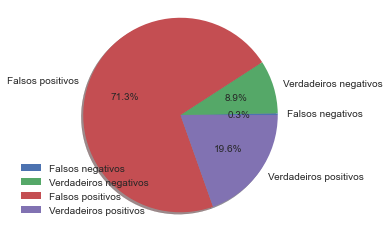

In [76]:
import matplotlib.pyplot as plt

labels = 'Falsos negativos', 'Verdadeiros negativos', 'Falsos positivos', 'Verdadeiros positivos'
sizes = [falsonegativo, verdadeironegativo, falsopositivos, verdadeiropositivos]

fig1, ax1 = plt.subplots()
ax1.pie (sizes, labels=labels, autopct='%1.1f%%', shadow = True)

plt.style.use("seaborn")
plt.legend(labels, loc=3)
ax1.axis('equal')
plt.show()

___


 

## Não podemos alimentar nossa base de Treinamento automaticamente utilizando o próprio classificador, tendo em vista o relativamente baixo índice de acertos dele. Esse baixa quantidade de acertos deve-se ao fato do nosso produto, o "Bis", ser um termo utilizado para se referir não só às pessoas bissexuais, mas também ao advérbio "bis" que diz respeito à repetição de algum ato. Entretanto, um possível plano de expansão poderia levar em conta tais fatores, para que nosso sistema melhorasse e pudesse trazer inúmeros benefícios à fabricante do Bis.    

## Além disso, o algoritmo não conseguia diferenciar mensagens que apresentavam ironia ou contradições, interpretando de maneira errônea o tweet. Isso, pois o algoritmo não se trata de uma I.A.(Inteligência Artificial), que seria capaz de distinguir tais anuâncias como essas.

## Nosso classificador de Naive-Bayes seria um modelo adequado para classificar atributos discretos, assim como diagnósticos médicos, busca por falhas em sistêmas mecânicos ou até mesmo análise de crédito.

## Para se melhorar o poder de classificação do classificador de Naive-Bayes, pode-se considerar algumas coisas: 
### • Se as funções contínuas em questão não apresentarem distribuição normal (Gaussiana) é cabível utilizar a transformação ou métodos diferentes para convertê-las para a distribuição normal. 
### • É altamente recomendável focar no pré-processamento de dados e na seleção de recursos, uma vez que técnicas de combinação com o classificador, como “ensembling", “bagging” e “boosting” têm como finalidade reduzir a variância. Porém, Naive-Bayes não apresenta variância para minimizar
### • Remover caracteísticas correlacionadas é essencial, pois podem levar a um excesso de importância pelo algoritmo.

# Concluindo...
## Para atingir maior satisfação com o classificador de Naive-Bayes é de suma importância a concentração de esforços para o pré-processamento de dados e na seleção de recursos antes de aplicar o algoritmo!

##### Fontes/Material de pesquisa:
#### • RAY, Sunil. 6 passos fáceis para aprender o algoritmo Naive Bayes (com o código em Python). 2016. Disponível em: https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/. Acesso em: 27 set. 2021.
#### • NASCIMENTO, Jardel da Cunha. AVALIAÇÃO DE DESEMPENHO DE ALGORITMOS DE CLASSIFICAÇÃO EM MINERAÇÃO DE OPINIÃO EM TEXTOS EM PORTUGUÊS. 2019. 65 f. Monografia (Especialização) - Curso de Sistemas de Informação, Universidade Federal do Acre, Rio Branco, 2019. Disponível em http://csi.ufac.br/academicUploads/tra1570048738.pdf, acesso em 26 de setembro de 2021, 17:10.
#### • PINA, Aloísio Carlos de; ZAVERUCHA, Gerson. Melhorando a Performance do Algoritmo Naive Bayes para Regressão Através da Combinação de Atributos. 2001. 9 f. Dissertação (Mestrado) - Curso de Sistemas de Informação, Universidade Federal do Rio de Janeiro, Rio de Janeiro, 2001. Disponível em: https://www.cos.ufrj.br/~ines/enia07_html/pdf/28095.pdf. Acesso em: 27 set. 2021.


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**